In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
import seaborn as sns

In [3]:
train = pd.read_csv("bank_train.csv")
test = pd.read_csv("bank_test.csv")

In [4]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,41,management,married,university.degree,no,no,no,telephone,jul,wed,5,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
1,33,admin.,single,university.degree,no,yes,no,cellular,may,mon,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
2,34,admin.,married,university.degree,no,no,yes,cellular,sep,wed,3,999,0,nonexistent,-1.1,94.199,-37.5,0.886,4963.6,yes
3,48,blue-collar,married,high.school,unknown,no,no,telephone,may,thu,4,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
4,32,admin.,married,university.degree,no,yes,no,telephone,may,fri,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
train.isnull().sum() #there are no missing values in this dataset

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26772 entries, 0 to 26771
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             26772 non-null  int64  
 1   job             26772 non-null  object 
 2   marital         26772 non-null  object 
 3   education       26772 non-null  object 
 4   default         26772 non-null  object 
 5   housing         26772 non-null  object 
 6   loan            26772 non-null  object 
 7   contact         26772 non-null  object 
 8   month           26772 non-null  object 
 9   day_of_week     26772 non-null  object 
 10  campaign        26772 non-null  int64  
 11  pdays           26772 non-null  int64  
 12  previous        26772 non-null  int64  
 13  poutcome        26772 non-null  object 
 14  emp.var.rate    26772 non-null  float64
 15  cons.price.idx  26772 non-null  float64
 16  cons.conf.idx   26772 non-null  float64
 17  euribor3m       26772 non-null 

In [7]:
from dabl import detect_types
types = detect_types(train) #checking on all the types through the whole train dataset
types

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
age,False,False,True,False,False,False,False
job,False,False,False,True,False,False,False
marital,False,False,False,True,False,False,False
education,False,False,False,True,False,False,False
default,False,False,False,True,False,False,False
housing,False,False,False,True,False,False,False
loan,False,False,False,True,False,False,False
contact,False,False,False,True,False,False,False
month,False,False,False,True,False,False,False
day_of_week,False,False,False,True,False,False,False


## Feature Engineering

### target transform 

#### 1.education

In [8]:
train['education'].unique() #unique for vairables

array(['university.degree', 'high.school', 'basic.4y', 'basic.9y',
       'professional.course', 'basic.6y', 'unknown', 'illiterate'],
      dtype=object)

In [9]:
train['education']=np.where(train['education']=='basic.4y','basic',train['education'])
train['education']=np.where(train['education']=='basic.6y','basic',train['education'])
train['education']=np.where(train['education']=='basic.9y','basic',train['education'])

test['education']=np.where(test['education']=='basic.4y','basic',test['education'])
test['education']=np.where(test['education']=='basic.6y','basic',test['education'])
test['education']=np.where(test['education']=='basic.9y','basic',test['education'])

#put all the basic educaiton dergee into one
train['education'].unique()

array(['university.degree', 'high.school', 'basic', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

In [10]:
train['education'].value_counts()

basic                  8197
university.degree      7897
high.school            6206
professional.course    3347
unknown                1110
illiterate               15
Name: education, dtype: int64

#### 2. pdays

In [11]:
train['pdays'].value_counts()

999    25744
3        307
6        275
4         78
9         46
2         44
10        38
7         37
12        35
5         33
13        21
11        17
15        16
14        16
1         15
0         13
8         11
16         7
18         6
17         4
19         3
21         2
25         1
27         1
22         1
26         1
Name: pdays, dtype: int64

In [12]:
def pdays_transform(days): #simply classify all the number of days into three categories
    if days <= 7:
        return "in_one_week"
    elif days <= 31:
        return "in_one_month"
    else:
        return "never"

In [13]:
train['pdays'] = train['pdays'].apply(pdays_transform)
test['pdays'] = test['pdays'].apply(pdays_transform)


In [14]:
train['pdays'].value_counts()

never           25744
in_one_week       802
in_one_month      226
Name: pdays, dtype: int64

#### 3. subscirbed

In [15]:
subscribed_dict = {'no':0,'yes':1} #labeling

In [16]:
train['subscribed'] = train['subscribed'].replace(subscribed_dict)

In [17]:
train['subscribed'].value_counts()

0    23756
1     3016
Name: subscribed, dtype: int64

### Continuous predictors 

In [18]:
continuous = types[types['continuous'] == True].index.to_list() + types[types['low_card_int'] == True].index.to_list()


In [19]:
continuous

['emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'age',
 'campaign',
 'previous']

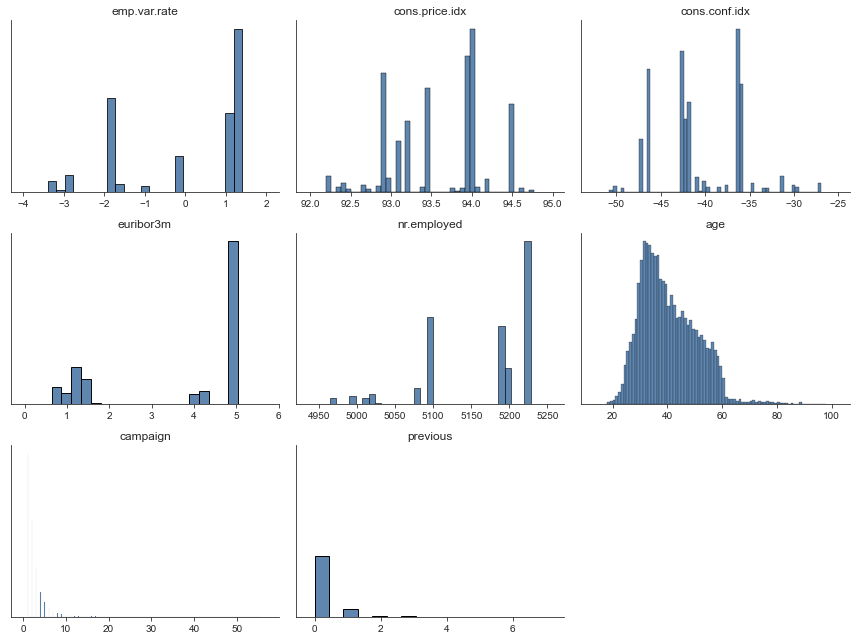

In [20]:
from tutorial4 import distplots

distplots(train[continuous]) 
plt.show()

/Users/whereismycarrot/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/whereismycarrot/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/whereismycarrot/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

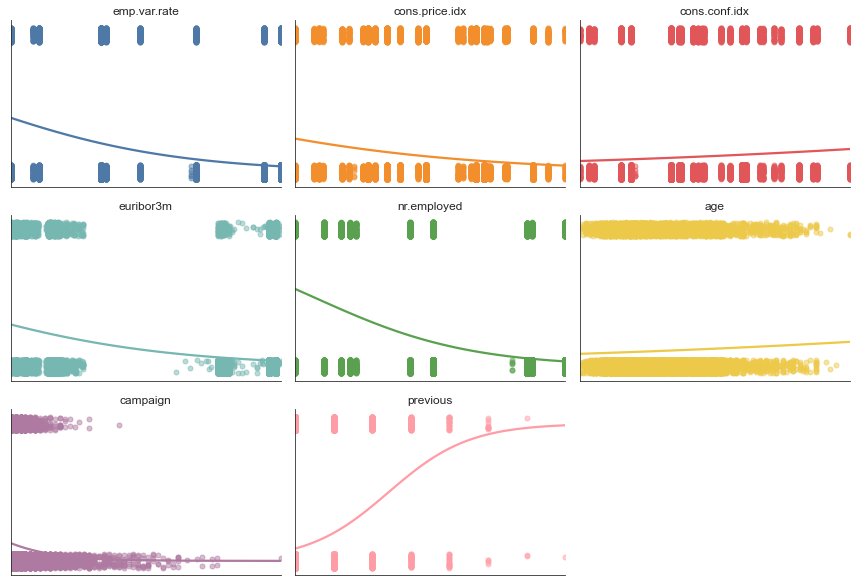

In [21]:
from tutorial4 import regplots

fig, ax = regplots(train[continuous], train['subscribed'])
plt.show()

### Discrete and categorical predictors 

In [22]:
types[types['categorical'] == True] #checking all the categorical vairable and put it  on the list

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
job,False,False,False,True,False,False,False
marital,False,False,False,True,False,False,False
education,False,False,False,True,False,False,False
default,False,False,False,True,False,False,False
housing,False,False,False,True,False,False,False
loan,False,False,False,True,False,False,False
contact,False,False,False,True,False,False,False
month,False,False,False,True,False,False,False
day_of_week,False,False,False,True,False,False,False
poutcome,False,False,False,True,False,False,False


In [23]:
(types[types['categorical'] == True]).index.to_list()

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'subscribed']

In [24]:
#to form a new categorical list by without label(subscribed) and add in pdays

In [25]:
categorical = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','pdays']

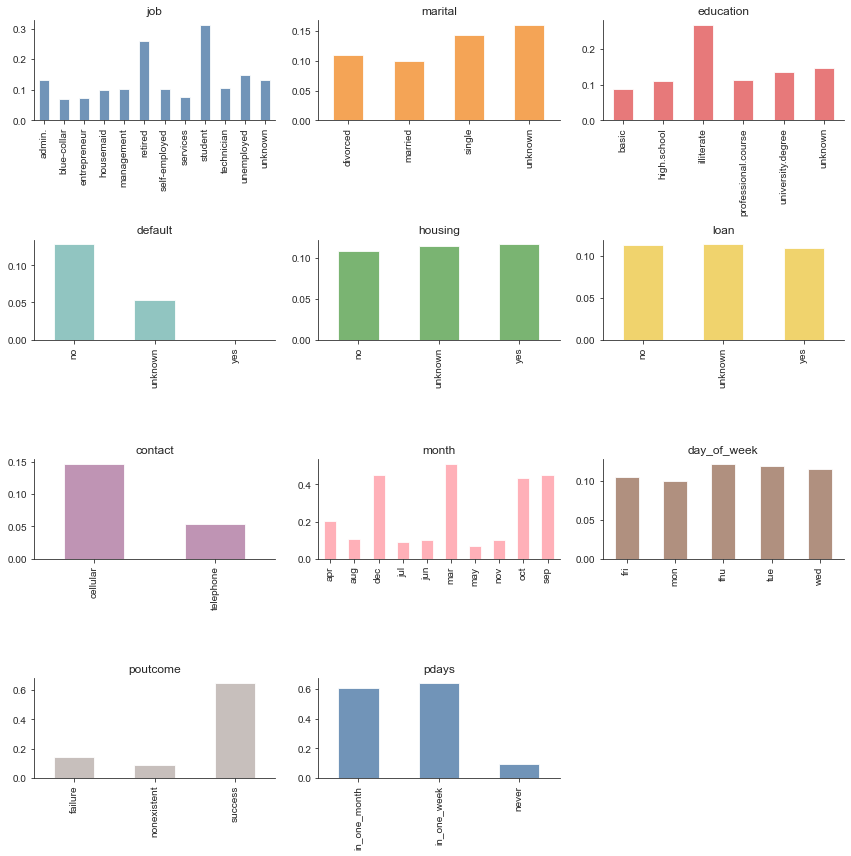

In [26]:
from tutorial4 import crosstabplots

crosstabplots(train[categorical], train['subscribed'])
plt.show()


In [27]:
#the result of this EDA could be housing and loan has no big impact on the subscribe

### relationship

In [28]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(train[continuous], train['subscribed'], random_state=1)
results1 = pd.DataFrame(mi, index=continuous, columns=['MI'])

results1
#the biggger the MI the stronger dependece between the vairable and subscribed

,MI
emp.var.rate,0.057587
cons.price.idx,0.069702
cons.conf.idx,0.067624
euribor3m,0.074819
nr.employed,0.062682
age,0.014036
campaign,0.004314
previous,0.021307


The scikit-learn method only accepts numerical features. Therefore, we have to use the OrdinalEncoder to encode the categorical predictors with numerical labels.

In [29]:
from sklearn.preprocessing import OrdinalEncoder
features = OrdinalEncoder().fit_transform(train[categorical])

mi = mutual_info_classif(features, train['subscribed'], n_neighbors=5, 
                         random_state=1, discrete_features=True)

results2 = pd.DataFrame(mi, index=categorical, columns=['MI'])
results2

,MI
job,0.010645
marital,0.001806
education,0.001950
default,0.005529
housing,0.000086
loan,0.000007
contact,0.011419
month,0.025477
day_of_week,0.000387
poutcome,0.031568


we concatenate the two sets of results into a single table.

In [30]:
results = pd.concat([results1, results2], axis=0).sort_values(by='MI', ascending=False).round(4)
results.round(4)

,MI
euribor3m,0.0748
cons.price.idx,0.0697
cons.conf.idx,0.0676
nr.employed,0.0627
emp.var.rate,0.0576
pdays,0.0319
poutcome,0.0316
month,0.0255
previous,0.0213
age,0.0140


## data processing 

In [31]:
dummies_train = pd.get_dummies(train[categorical], drop_first = True)#dummy encoding
dummies_test = pd.get_dummies(test[categorical], drop_first = True)
dummies_train#dummy all the categorical variables

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,pdays_in_one_week,pdays_never
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26767,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
26768,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
26769,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
26770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [32]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train[continuous])
scaled_train_num = scaler.transform(train[continuous])
scaled_test_num = scaler.transform(test[continuous])
#normolized numberical data for logstic regression
scaled_train_num

array([[1.        , 0.66913484, 0.33891213, ..., 0.2962963 , 0.07272727,
        0.        ],
       [0.33333333, 0.26968044, 0.19246862, ..., 0.19753086, 0.05454545,
        0.        ],
       [0.47916667, 0.7786438 , 0.55648536, ..., 0.20987654, 0.03636364,
        0.        ],
       ...,
       [1.        , 0.66913484, 0.33891213, ..., 0.43209877, 0.07272727,
        0.        ],
       [1.        , 0.48441154, 0.61506276, ..., 0.24691358, 0.10909091,
        0.        ],
       [0.33333333, 0.26968044, 0.19246862, ..., 0.11111111, 0.05454545,
        0.        ]])

两个数据横着拼接起来

In [33]:
X_train= np.hstack((dummies_train, scaled_train_num))
X_test = np.hstack((dummies_test, scaled_test_num))
y = train['subscribed'].values

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y,test_size = 0.2,shuffle = False, random_state = 0)

## Model 

In [34]:
from sklearn.model_selection import GridSearchCV

### 1. Logistic Regression

In [35]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.2962963 , 0.07272727,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.19753086, 0.05454545,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.20987654, 0.03636364,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.43209877, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.18518519, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.13580247, 0.09090909,
        0.        ]])

In [36]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(logit.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(logit.score(X_valid, y_valid)))

Accuracy on training set: 0.901
Accuracy on validation set: 0.899


/Users/whereismycarrot/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:

param_grid_logit = {'C': [1, 0.1, 0.01, 0.001], 
                    'penalty': ['l1', 'l2']}

grid_search_logit = GridSearchCV(LogisticRegression(), param_grid=param_grid_logit, 
                                 cv=10, return_train_score=False)

grid_search_logit.fit(X_train, y_train)

print("Test set score: {:.3f}".format(grid_search_logit.score(X_valid, y_valid)))
print("Best parameters: {}".format(grid_search_logit.best_params_))
print("Best cross-validation score: {:.3f}".format(grid_search_logit.best_score_))
print("Best estimator:\n{}".format(grid_search_logit.best_estimator_))

/Users/whereismycarrot/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/whereismycarrot/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/whereismycarrot/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/whereismycarrot/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score o

/Users/whereismycarrot/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/whereismycarrot/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/whereismycarrot/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/whereismycarrot/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/whereismycarrot/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/whereismycarrot/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score o

/Users/whereismycarrot/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/whereismycarrot/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/whereismycarrot/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/whereismycarrot/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score o

/Users/whereismycarrot/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.90087302        nan 0.89993912        nan 0.89923884
        nan 0.88700564]
  warnings.warn(
/Users/whereismycarrot/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test set score: 0.899
Best parameters: {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 0.901
Best estimator:
LogisticRegression(C=1)


In [38]:
logit = grid_search_logit.best_estimator_

In [39]:
predictors = dummies_train.columns.to_list() + continuous
predictors #making column names for plot

['job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_unknown',
 'default_yes',
 'housing_unknown',
 'housing_yes',
 'loan_unknown',
 'loan_yes',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_nonexistent',
 'poutcome_success',
 'pdays_in_one_week',
 'pdays_never',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'age',
 'campaign',
 'previous']

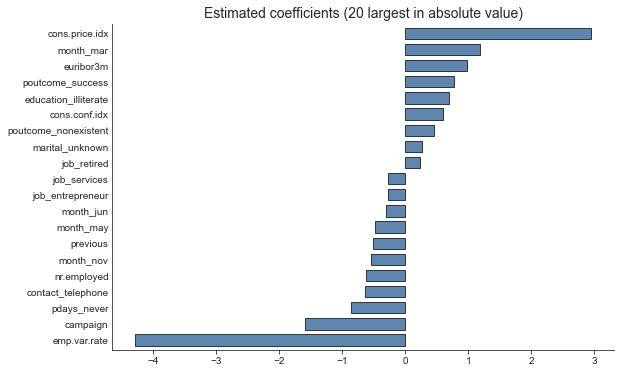

In [40]:
from tutorial4 import coefplot 

coefplot(logit, predictors)
plt.show()

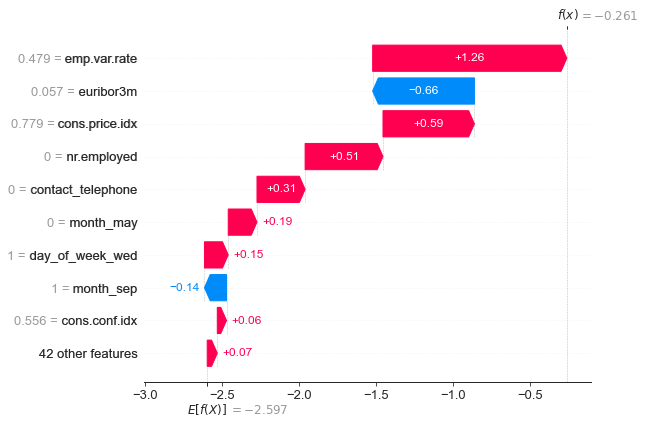

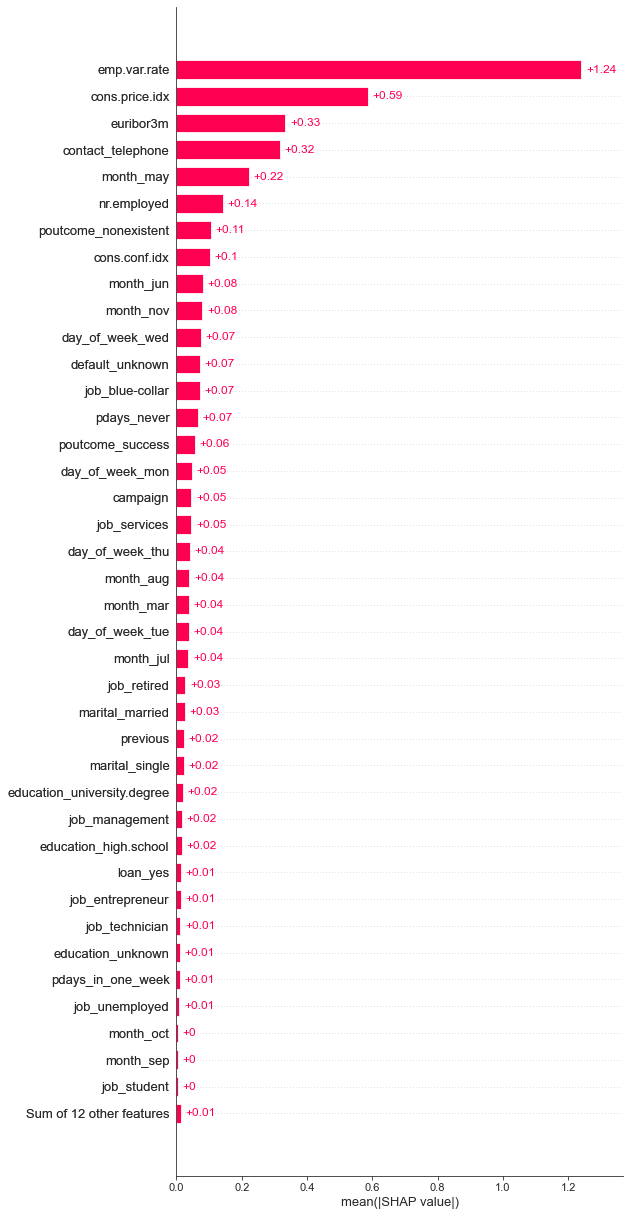

In [41]:
X_df = pd.DataFrame(X_train, columns = predictors)

import shap
shap.initjs()

explainer = shap.Explainer(logit, X_df)
shap_values = explainer(X_df)
shap.plots.waterfall(shap_values[2])

shap.plots.bar(shap_values, max_display = 40)

### 2.Decision Tree 

In [42]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(tree.score(X_valid, y_valid)))

Accuracy on training set: 0.900
Accuracy on validation set: 0.900


In [43]:
param_grid_tree = {'criterion': ['entropy'], 
                   'max_depth': [3,5, 7, 9], 
                   'random_state': [27]}

grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_tree, 
                                 cv=5, return_train_score=False)

grid_search_tree.fit(X_train, y_train)

print("Test set score: {:.3f}".format(grid_search_tree.score(X_valid, y_valid)))
print("Best parameters: {}".format(grid_search_tree.best_params_))
print("Best cross-validation score: {:.3f}".format(grid_search_tree.best_score_))
print("Best estimator:\n{}".format(grid_search_tree.best_estimator_))


Test set score: 0.900
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'random_state': 27}
Best cross-validation score: 0.901
Best estimator:
DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=27)


In [44]:
tree = grid_search_tree.best_estimator_

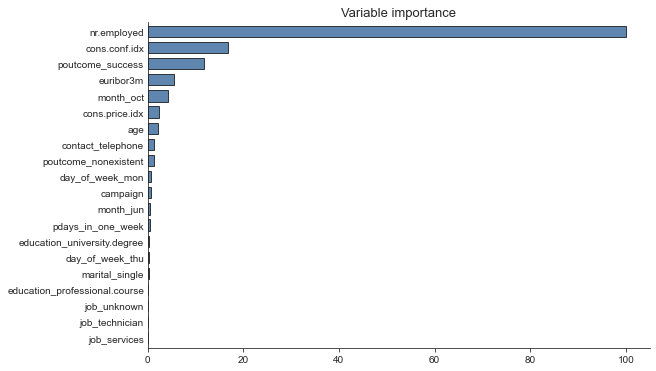

In [45]:
from tutorial9 import plot_feature_importance

plot_feature_importance(tree, labels = predictors)
plt.show()

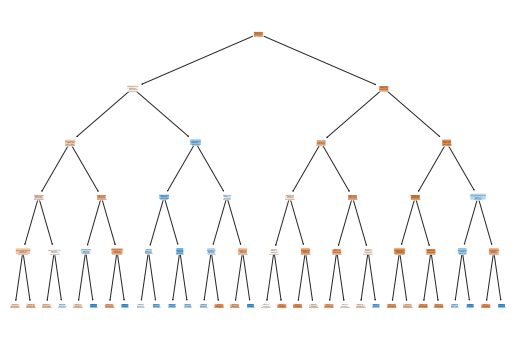

In [46]:
from sklearn.tree import plot_tree

plot_tree(tree, feature_names = predictors, class_names=['non_subscribe','subscribe'], impurity=False,
          rounded=True, filled = True)
plt.show()


### 3.Random Forest 

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=27)
rf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(rf.score(X_valid, y_valid)))

Accuracy on training set: 0.918
Accuracy on validation set: 0.900


In [48]:
#testing
param_grid_RF = {'n_estimators': range(25,225,25), 
                 'max_depth': range(5,50,5), 
                 'random_state': range(21,31,2)}

grid_search_RF = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_RF, 
                              cv=5, return_train_score=False)

grid_search_RF.fit(X_train, y_train)

print("Test set score: {:.3f}".format(grid_search_RF.score(X_valid, y_valid)))
print("Best parameters: {}".format(grid_search_RF.best_params_))
print("Best cross-validation score: {:.3f}".format(grid_search_RF.best_score_))
print("Best estimator:\n{}".format(grid_search_RF.best_estimator_))

Test set score: 0.900
Best parameters: {'max_depth': 10, 'n_estimators': 200, 'random_state': 21}
Best cross-validation score: 0.902
Best estimator:
RandomForestClassifier(max_depth=10, n_estimators=200, random_state=21)


In [49]:
param_grid_RF = {'n_estimators': [50,100,150], 
                 'max_depth': [5,10,15], 
                 'random_state': [26,27,29]}

grid_search_RF = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_RF, 
                              cv=5, return_train_score=False)

grid_search_RF.fit(X_train, y_train)

print("Test set score: {:.3f}".format(grid_search_RF.score(X_valid, y_valid)))
print("Best parameters: {}".format(grid_search_RF.best_params_))
print("Best cross-validation score: {:.3f}".format(grid_search_RF.best_score_))
print("Best estimator:\n{}".format(grid_search_RF.best_estimator_))

Test set score: 0.900
Best parameters: {'max_depth': 10, 'n_estimators': 100, 'random_state': 27}
Best cross-validation score: 0.901
Best estimator:
RandomForestClassifier(max_depth=10, random_state=27)


In [50]:
rf = grid_search_RF.best_estimator_

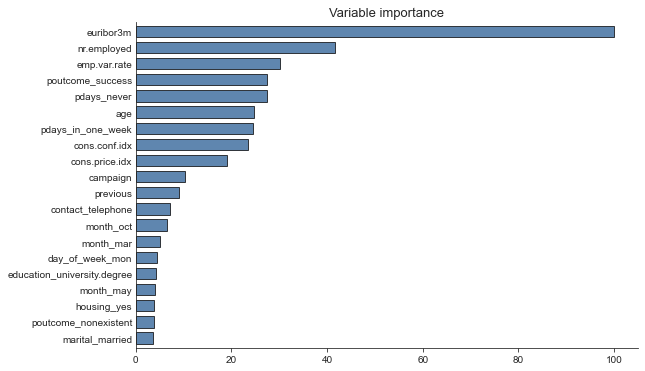

In [51]:
from tutorial9 import plot_feature_importance

plot_feature_importance(rf, labels = predictors)
plt.show()

### 4.Gradient Boosting

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate = 0.01,n_estimators = 10)
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(gb.score(X_valid, y_valid)))


Accuracy on training set: 0.887
Accuracy on validation set: 0.889


In [53]:
param_grid_gb = {'learning_rate': [0.001, 0.01, 0.02], 
                 'max_depth': [5, 10, 15], 
                 'n_estimators': [10,15,20]}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid_gb, 
                              cv=5, return_train_score=False)

grid_search_gb.fit(X_train, y_train)

print("Test set score: {:.3f}".format(grid_search_gb.score(X_valid, y_valid)))
print("Best parameters: {}".format(grid_search_gb.best_params_))
print("Best cross-validation score: {:.3f}".format(grid_search_gb.best_score_))
print("Best estimator:\n{}".format(grid_search_gb.best_estimator_))

Test set score: 0.889
Best parameters: {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 10}
Best cross-validation score: 0.887
Best estimator:
GradientBoostingClassifier(learning_rate=0.001, max_depth=5, n_estimators=10)


In [54]:
gb = grid_search_gb.best_estimator_

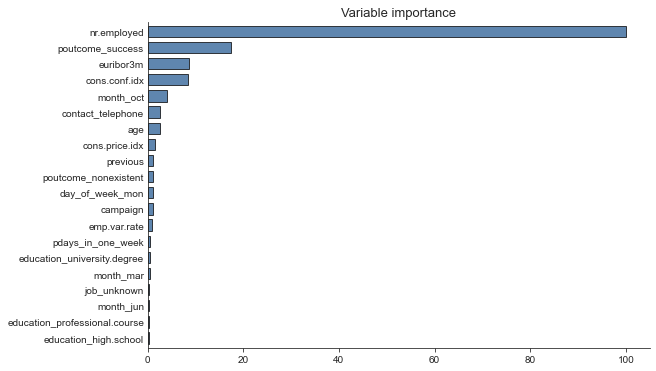

In [55]:
from tutorial9 import plot_feature_importance

plot_feature_importance(gb, labels = predictors)
plt.show()

### 5. model stacking

In [56]:
from mlxtend.classifier import StackingCVClassifier
from sklearn.linear_model import LogisticRegression
import warnings

warnings.simplefilter('ignore')

RANDOM_SEED = 42

clf1 = logit
clf2 = tree
clf3 = rf
clf4 = gb
lr = LogisticRegression()

stack = StackingCVClassifier(classifiers=[clf1, clf2, clf3,clf4],
                            meta_classifier=lr,
                            random_state=RANDOM_SEED,
                             use_probas = True,
                             cv = 5,
                             store_train_meta_features = True)
stack.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(stack.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(stack.score(X_valid, y_valid)))

Accuracy on training set: 0.911
Accuracy on validation set: 0.901


In [57]:
stack.meta_clf_.coef_

array([[-0.77946218,  0.82259199, -0.72636047,  0.76949028, -1.72575649,
         1.7688863 ,  0.02825416,  0.01487565]])

# Comparison with models

In [58]:
import pandas as pd

data = {"Actual/Predicted":  ["not-subscribed", "subscribed"],
        "not-subscribed": [0,1],
        "subscribed" : [1,0]
        }

df = pd.DataFrame(data)

print (df.to_string(index=False))

Actual/Predicted  not-subscribed  subscribed
  not-subscribed               0           1
      subscribed               1           0


logistic Regression


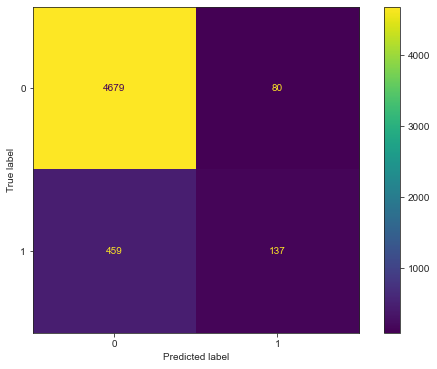

Decision Tree


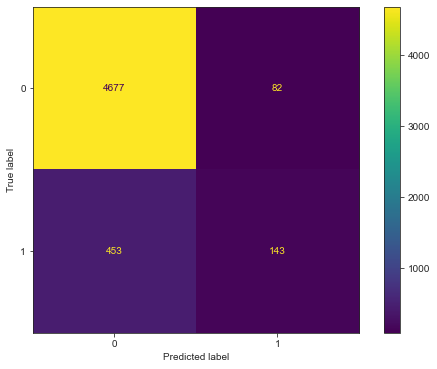

Random Forest


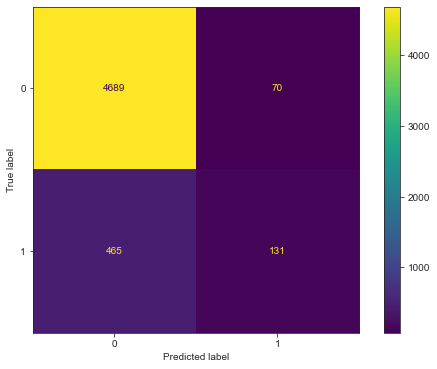

Gradient Boosting


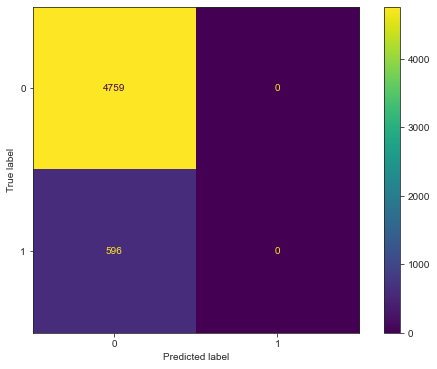

Stacking


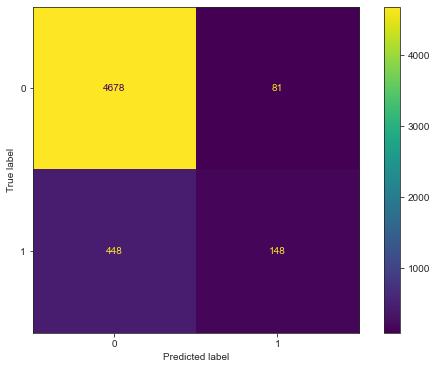

,Estimated risk,SE,Accuracy,Sensitivity,Specificity,Precision,AUC,Cross-entropy
logistic Regression,0.10065,0.00411,0.89935,0.22987,0.98319,0.63134,0.78111,0.28050
Decision Tree,0.09991,0.00410,0.90009,0.23993,0.98277,0.63556,0.77052,0.30491
Random Forest,0.09991,0.00410,0.90009,0.21980,0.98529,0.65174,0.78774,0.27647
Gradient Boosting,0.11130,0.00430,0.88870,0.00000,1.00000,0.00000,0.77594,0.34717
Stacking,0.09879,0.00408,0.90121,0.24832,0.98298,0.64629,0.78724,0.27977


In [59]:
from sklearn.metrics import confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, log_loss
from sklearn.metrics import accuracy_score
# Initialise table
columns=['Estimated risk', 'SE', 'Accuracy','Sensitivity','Specificity','Precision','AUC','Cross-entropy']
rows=['logistic Regression', 'Decision Tree', 'Random Forest','Gradient Boosting','Stacking']

results =pd.DataFrame(0.0, columns=columns, index=rows)

# Methods
methods = [logit, tree, rf,gb, stack]

# Compute test predictions
y_valid = np.ravel(y_valid)
y_prob = np.zeros((len(y_valid), len(rows)))

for i, method in enumerate(methods):
    
    y_prob[:, i] = method.predict_proba(X_valid)[:,1]
    y_pred =method.predict(X_valid)
    
    loss = 1 * ((y_pred != y_valid) & (y_pred ==0)) + 1 * ((y_pred != y_valid) & (y_pred ==1)) #loss matrix
    tn, fp, fn, tp = confusion_matrix(y_valid,y_pred).ravel()
    cm = confusion_matrix(y_valid,y_pred, labels=rf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)#confusion matrix
    print("{}".format(rows[i]))
    disp.plot()
    plt.show()
    
    results.iloc[i, 0] = np.mean(loss)
    results.iloc[i, 1] = np.std(loss)/np.sqrt(len(y_valid))
    results.iloc[i, 2] = accuracy_score(y_valid, y_pred)
    results.iloc[i, 3] = tp/(tp+fn)
    results.iloc[i, 4] = tn/(tn+fp)
    results.iloc[i, 5] = precision_score(y_valid, y_pred)
    results.iloc[i, 6] = roc_auc_score(y_valid, y_prob[:, i])
    results.iloc[i, 7] = log_loss(y_valid, y_prob[:, i])

results.round(5)

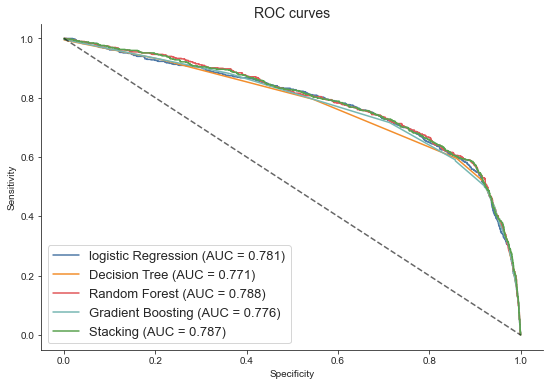

In [60]:
from tutorial4 import rocplot

fig, ax = rocplot(y_valid, y_prob, labels=pd.Series(rows))
plt.show()

# output for submission

In [64]:
x_test = np.hstack((dummies_test, scaled_test_num))

In [122]:
logit_output=logit.predict_proba(x_test)
output_df = pd.DataFrame(test.index, columns = ['id'])
output_df['subscribed'] = logit_output[:,1]
output_df.to_csv('logit_output.csv', index = False)

In [65]:
tree_output= tree.predict_proba(x_test)
output_df = pd.DataFrame(test.index, columns = ['id'])
output_df['subscribed'] = tree_output[:,1]
output_df.to_csv('tree_output.csv', index = False)

In [81]:
rf_output= rf.predict_proba(x_test)
output_df = pd.DataFrame(test.index, columns = ['id'])
output_df['subscribed'] = rf_output[:,1]
output_df.to_csv('rf_output.csv', index = False)

In [98]:
gb_output= gb.predict_proba(x_test)
output_df = pd.DataFrame(test.index, columns = ['id'])
output_df['subscribed'] = gb_output[:,1]
output_df.to_csv('gb_output.csv', index = False)

In [99]:
stack_output= stack.predict_proba(x_test)
output_df = pd.DataFrame(test.index, columns = ['id'])
output_df['subscribed'] = stack_output[:,1]
output_df.to_csv('stack_output.csv', index = False)

In [83]:
df1 = pd.read_csv('./rf_output.csv')

In [84]:
df1.head()

,id,subscribed
0,0,0.586261
1,1,0.038511
2,2,0.047121
3,3,0.412815
4,4,0.027617
